In [1]:
import os, sys, pickle

import matplotlib.pyplot as plt
import numpy as np
import collections
%matplotlib inline 
import os

import jp_mpl as jplot

from scipy import optimize
from matplotlib.colors import LogNorm
import pickle

# My tools
import jp_analysis as analysis


from copy import deepcopy

In [2]:
import ROOT

## Using the file that Jie prepared

In [3]:
pmt_info = pickle.load(open('/home/jpyanez/snoplus/snoplus_python/pmt_positions.pckl'))

In [4]:
#low_gain pmts are type==3
lowgain = pmt_info['type']==3

In [5]:
infile = ROOT.TFile('/home/jpyanez/snoplus/data/n16/Merged_Fit_100934.root')

hist = infile.Get('htResVsPMTID')
x_bins = hist.GetNbinsX()
y_bins = hist.GetNbinsY()
tcenters = np.zeros(y_bins)
bins = np.zeros((x_bins,y_bins))
for y_bin in xrange(y_bins):
    tcenters[y_bin] = hist.GetYaxis().GetBinCenter(y_bin)
    for x_bin in xrange(x_bins): 
        bins[x_bin,y_bin] = hist.GetBinContent(x_bin + 1,y_bin + 1)
tedges = np.concatenate((tcenters - 0.5, [tcenters[-1]+0.5]))
infile.Close()

/gs/software/CentOS-6/eb/software/Toolchain/iomkl/2015b/IPython/3.2.1-Python-2.7.10/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from IPython.kernel.zmq import kernelapp as app


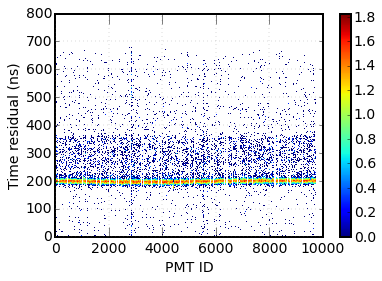

In [7]:
# This is the realigned histogram
plt.imshow(np.log10(bins.T), interpolation='nearest', aspect='auto',
          origin='lower')
plt.colorbar()
plt.ylabel('Time residual (ns)')
plt.xlabel('PMT ID')

In [9]:
bins.shape

(10000, 800)

(1000, 1000000)

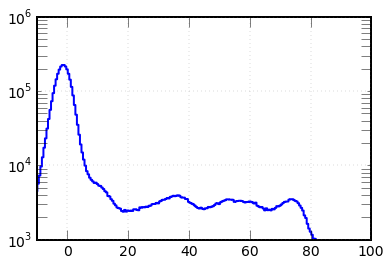

In [23]:
jplot.unfilledBar(tedges, bins[:,:].sum(axis=0))
plt.xlim(-10, 100)
plt.yscale('log')
plt.ylim(10**3, 10**6)

49